In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics

In [80]:
X = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [81]:
X.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [82]:
X['PassengerId'].nunique()
#Entirely Unique so we'll remove it 

891

In [83]:
X.drop('PassengerId', axis=1 inplace=True)

SyntaxError: invalid syntax (<ipython-input-83-0d66cd5b4886>, line 1)

There are 891 passengers in the data, 549 survived and 342 perished


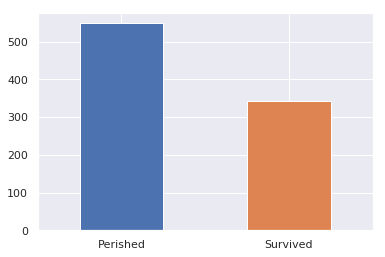

In [84]:
X['Survived'].value_counts().plot(kind='bar')

plt.xticks([0,1], ['Perished', 'Survived'],  rotation='horizontal')

print 'There are {} passengers in the data, {} survived and {} perished'.format(X['Survived'].count(), X['Survived'].value_counts()[0], X['Survived'].value_counts()[1])

There are 3 classes of passenger: 1st, 2nd and 3rd.
There are 216 in 1st class, 184 in 2nd class and 491 in 3rd class


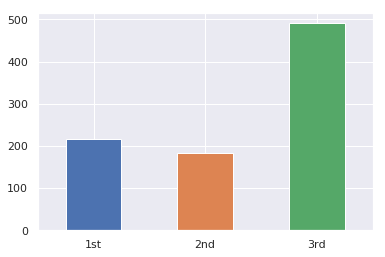

In [85]:
X['Pclass'].value_counts().sort_index().plot(kind='bar')

plt.xticks([0, 1, 2], ['1st', '2nd', '3rd' ],  rotation='horizontal')

print'There are 3 classes of passenger: 1st, 2nd and 3rd.\nThere are {} in 1st class, {} in 2nd class and {} in 3rd class'.format( X['Pclass'].value_counts()[1], X['Pclass'].value_counts()[2], X['Pclass'].value_counts()[3])

There are 577 men and 314 women 


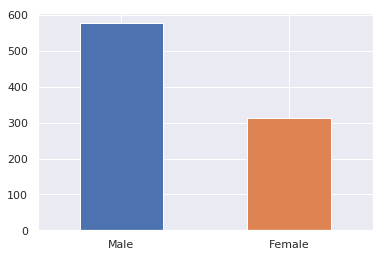

In [86]:
X.loc[:,'Sex'].replace({'male':1, 'female':0},inplace=True)

X['Sex'].value_counts().plot(kind='bar')

plt.xticks([0, 1], ['Male', 'Female'],  rotation='horizontal')

print'There are {} men and {} women '.format( X['Sex'].value_counts()[1], X['Sex'].value_counts()[0])

In [111]:
X['Age'].describe()

X['Age'].isnull().sum()

177

The ages range between 0.42 and 80.0 years old.
The mean, median and mode are 29.6991176471, 28.0 and 24.0, the data shows a positive skew.
Of 891 values there are 177 null values


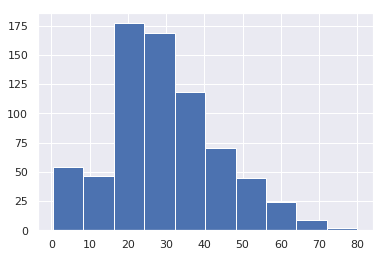

In [115]:
X['Age'].hist()

Ages = X['Age'].describe()

print'The ages range between {} and {} years old.\nThe mean, median and mode are {}, {} and {}, the data shows a positive skew.\nOf {} values there are {} null values'.format(
    Ages['min'], Ages['max'], Ages['mean'], X['Age'].median(), X['Age'].mode()[0], 891, X['Age'].isnull().sum()
)

In [116]:
X['Family'] = X['SibSp'] + X['Parch']

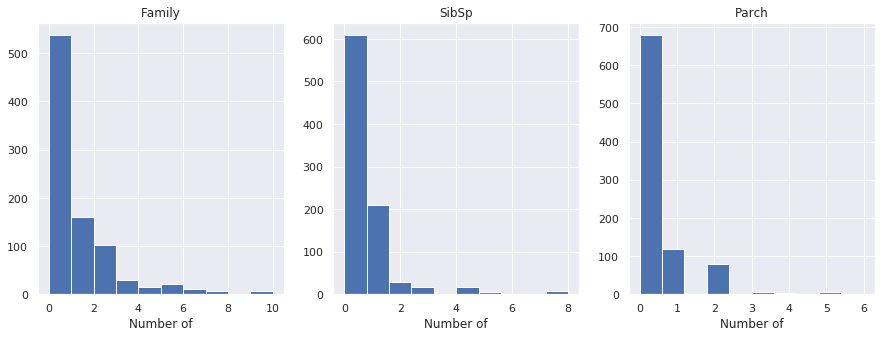

In [132]:
fig, axarr = plt.subplots(1, 3, figsize = (15, 5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plots = ['Family', 'SibSp', 'Parch']
for i in range(3):
    plt.sca(axarr[i])
    plt.hist(X[plots[i]])
    plt.title(plots[i])
    plt.xlabel('Number of')

In [87]:
#Checking the null values as a percentage of total values
null = X.isnull().sum().astype(float)/X.shape[0]
null[null!=0]

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

In [4]:
#77% data missing no point in keeping, cannot reconstruct
X.drop('Cabin', axis=1, inplace=True)

In [5]:
X['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [6]:
#S is the mode so we'll impute using that 
X.loc[:,'Embarked'].fillna('S', inplace=True)

In [7]:
X['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [8]:
X['Ticket'].value_counts()

CA. 2343             7
347082               7
1601                 7
347088               6
CA 2144              6
3101295              6
382652               5
S.O.C. 14879         5
PC 17757             4
4133                 4
LINE                 4
349909               4
347077               4
W./C. 6608           4
113760               4
2666                 4
113781               4
19950                4
17421                4
347742               3
239853               3
110152               3
24160                3
13502                3
PC 17572             3
C.A. 34651           3
248727               3
35273                3
F.C.C. 13529         3
PC 17755             3
                    ..
330877               1
315094               1
236852               1
4137                 1
4136                 1
226593               1
4134                 1
374746               1
110813               1
C.A. 6212            1
349219               1
34218                1
343120     

In [9]:
X.loc[X['Ticket'].str.contains('[a-zA-Z]'), 'Ticket']

0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
10                PP 9549
12              A/5. 2151
30               PC 17601
31               PC 17569
33             C.A. 24579
34               PC 17604
37             A./5. 2152
43          SC/Paris 2123
45        S.C./A.4. 23567
51             A/4. 39886
52               PC 17572
56             C.A. 31026
58             C.A. 34651
59                CA 2144
64               PC 17605
66             C.A. 29395
67              S.P. 3464
70             C.A. 33111
71                CA 2144
72           S.O.C. 14879
84             SO/C 14885
86             W./C. 6608
87        SOTON/OQ 392086
92            W.E.P. 5734
93              C.A. 2315
96               PC 17754
97               PC 17759
              ...        
744     STON/O 2. 3101288
745             WE/P 5735
746             C.A. 2673
761      SOTON/O2 3101272
772           S.O./P.P. 3
783            W./C. 6607
784    SOTON/O.Q. 3101312
788         

In [210]:
X.loc[X['Ticket'].str.contains('[a-zA-Z]'), 'Ticket'].value_counts().sort_index(ascending=True)

A./5. 2152           1
A./5. 3235           1
A.5. 11206           1
A.5. 18509           1
A/4 45380            1
A/4 48871            2
A/4. 20589           1
A/4. 34244           1
A/4. 39886           1
A/5 21171            1
A/5 21172            1
A/5 21173            1
A/5 21174            1
A/5 2466             1
A/5 2817             1
A/5 3536             1
A/5 3540             1
A/5 3594             1
A/5 3902             1
A/5. 10482           1
A/5. 13032           1
A/5. 2151            1
A/5. 3336            2
A/5. 3337            1
A/5. 851             1
A/S 2816             1
A4. 54510            1
C 17369              1
C 4001               1
C 7075               1
                    ..
SOTON/OQ 392082      1
SOTON/OQ 392086      1
SOTON/OQ 392089      1
SOTON/OQ 392090      1
STON/O 2. 3101269    1
STON/O 2. 3101273    1
STON/O 2. 3101274    1
STON/O 2. 3101275    1
STON/O 2. 3101280    1
STON/O 2. 3101285    1
STON/O 2. 3101286    1
STON/O 2. 3101288    1
STON/O 2. 3

In [211]:
X['Ticket'] = X['Ticket'].str.split()
X['Ticket']

0             [A/5, 21171]
1              [PC, 17599]
2      [STON/O2., 3101282]
3                 [113803]
4                 [373450]
5                 [330877]
6                  [17463]
7                 [349909]
8                 [347742]
9                 [237736]
10              [PP, 9549]
11                [113783]
12            [A/5., 2151]
13                [347082]
14                [350406]
15                [248706]
16                [382652]
17                [244373]
18                [345763]
19                  [2649]
20                [239865]
21                [248698]
22                [330923]
23                [113788]
24                [349909]
25                [347077]
26                  [2631]
27                 [19950]
28                [330959]
29                [349216]
              ...         
861                [28134]
862                [17466]
863            [CA., 2343]
864               [233866]
865               [236852]
866       [SC/PARIS, 2149]
8

In [212]:
X['TicketNum'] = X['Ticket'].apply(lambda x: x[-1])

In [213]:
def ticket_clean(x):
    if len(x) == 1:
        x = 'NoPrefix'
        return x
    else:
        del x[-1]
        x= ''.join(x)
        return x
    
X['Ticket'] = X['Ticket'].apply(ticket_clean)
X.loc[X['Ticket'].str.contains('[a-zA-Z]'), 'Ticket'].value_counts()

NoPrefix      665
PC             60
C.A.           27
STON/O2.       18
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
CA              6
F.C.C.          5
C               5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
A/4.            3
PP              3
A/4             3
P/PP            2
S.C./PARIS      2
SC/AH           2
WE/P            2
SOTON/O2        2
A.5.            2
A./5.           2
SCO/W           1
W.E.P.          1
SC              1
S.C./A.4.       1
SO/C            1
Fa              1
A/S             1
S.P.            1
F.C.            1
S.W./PP         1
SW/PP           1
SC/AHBasle      1
A4.             1
S.O.P.          1
C.A./SOTON      1
W/C             1
Name: Ticket, dtype: int64

In [214]:
X['Ticket'] = X['Ticket'].apply(lambda x: x.split('.')).apply(lambda x: ''.join(x)).sort_values()

X.loc[X['Ticket'].str.contains('[a-zA-Z]'), 'Ticket'].value_counts()

NoPrefix      665
PC             60
CA             41
A/5            19
STON/O2        18
SOTON/OQ       15
W/C            10
SC/PARIS        7
A/4             6
C               5
SOC             5
FCC             5
SC/Paris        4
SO/PP           3
PP              3
SOTON/O2        2
P/PP            2
SC/AH           2
WE/P            2
A5              2
SW/PP           2
Fa              1
FC              1
SC/AHBasle      1
CA/SOTON        1
SC/A4           1
SO/C            1
A4              1
SOP             1
SC              1
SP              1
WEP             1
A/S             1
SCO/W           1
Name: Ticket, dtype: int64

In [215]:
prefixes = ['SCO/', 'A4|A5', 'WEP', 'SP', 'SC', 'SOP', 'SO/', 'SC/', 'CA|CA/', 'FC', 'SW/', '/PP|PP/', '/P|P/', 'WE/', 'SOTON/', 'STON/', 'PC']


In [216]:
for item in prefixes:
    X.loc[X['Ticket'].str.contains(item, case=False), 'Ticket'] = item

In [217]:
X['Ticket'].value_counts()

NoPrefix    665
PC           60
CA|CA/       42
A/5          19
STON/        18
SOTON/       17
SC           16
W/C          10
A/4           6
FC            6
SOC           5
C             5
A4|A5         4
/P|P/         4
SO/           4
PP            3
SW/           2
Fa            1
A/S           1
WEP           1
SP            1
SOP           1
Name: Ticket, dtype: int64

In [218]:
prefixes_2 = ['A4', 'A5']
X['Ticket'] = X['Ticket'].apply(lambda x: x.split('/')).apply(lambda x: ''.join(x)).sort_values()
X['Ticket'] = X['Ticket'].apply(lambda x: x.split('|')).apply(lambda x: ''.join(x)).sort_values()

In [219]:
X['Ticket'].value_counts()

NoPrefix    665
PC           60
CACA         42
A5           19
STON         18
SOTON        17
SC           16
WC           10
PP            7
A4            6
FC            6
SOC           5
C             5
A4A5          4
SO            4
SW            2
WEP           1
Fa            1
SP            1
SOP           1
AS            1
Name: Ticket, dtype: int64

In [220]:
for item in prefixes_2:
    X.loc[X['Ticket'].str.contains(item, case=False), 'Ticket'] = item

In [221]:
others = ['SOP', 'SP', 'AS', 'WEP', 'Fa', 'SW', 'SO', 'SOC', 'FC', 'C', 'PP']
X.loc[X['Ticket'] == 'CACA', 'Ticket'] = 'CA'
X.loc[X['Ticket'] == 'A5', 'Ticket'] = 'A'
X.loc[X['Ticket'] == 'A4', 'Ticket'] = 'A'
for item in others:
    X.loc[X['Ticket'] == item, 'Ticket'] = 'other'

In [222]:
X['Ticket'].value_counts()

NoPrefix    665
PC           60
CA           42
other        34
A            29
STON         18
SOTON        17
SC           16
WC           10
Name: Ticket, dtype: int64

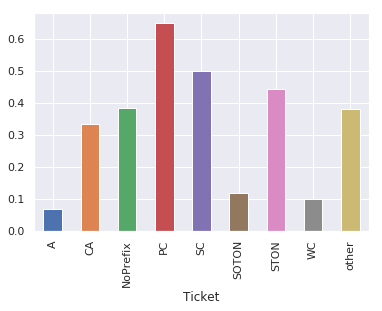

In [224]:
X.groupby('Ticket')['Survived'].mean().plot(kind='bar')

In [ ]:
encoded_embarked = pd.get_dummies(X['Embarked'])
X = pd.concat([X, encoded_embarked], axis=1)
X.drop('Embarked', axis = 1, inplace = True)

In [ ]:
#Basically unique, so drop

In [ ]:
X.drop(['Cabin','PassengerId', 'Ticket'], inplace=True, axis=1),
X['Embarked'] = X['Embarked'].fillna('S')
X['Sex'].replace({'male':0, 'female':1}, inplace = True) #Replacing gender with binary, will have to happen anyway
X.head(3)

In [ ]:
#Next to fill in age
X['Age'].hist()
print X['Age'].mean(), X['Age'].median()
#TO DO find a better way to reconstruct Age
#For now will use median due to resistance to skew

In [ ]:
def extract_titles(df):
    if 'Name' in df:
        split_names = df['Name'].str.split(',')
        titles = split_names.apply(lambda x: x[1]).str.strip().str.split('.').apply(lambda x: x[0])
        df['Title'] = titles
        mens_titles = ['Jonkheer', 'Sir', 'Capt', 'Col', 'Don', 'Dr', 'Rev', 'Major']
        mrs_titles = ['Mme']
        miss_titles = ['Ms', 'Lady', 'Mlle', 'the Countess']
        
        for title in mens_titles:
            df.loc[df['Title'] == title, 'Title'] = 'Mr'
        
        for title in miss_titles :
            df.loc[df['Title'] == title, 'Title'] = 'Miss'
            
        for title in mrs_titles:
            df.loc[df['Title'] == title, 'Title'] = 'Mrs'
            
    encoded_titles = pd.get_dummies(df['Title'])
    df = pd.concat([df, encoded_titles], axis=1)
    df = df.drop(['Name', 'Title'], axis = 1)
    return df

extract_titles(X)

In [ ]:
for pclass in X['Pclass'].unique():
    sns.kdeplot(X[X['Pclass']==pclass]['Age'], label = pclass)
#Showing relationship between age and pclass

In [ ]:
X.groupby('Pclass')['Age'].mean()

In [ ]:
for pclass in X['Pclass'].unique():
        X.loc[(X['Pclass'] == pclass) & (X['Age'].isnull()), 'Age'] = X.groupby('Pclass')['Age'].mean().loc[pclass]
        
#Reconstruct Age based on Pclass

In [ ]:
plt.subplot(121)
plt.hist(X[X['Survived']== 0 ]['Pclass'])
plt.title('Perished')
plt.subplot(122)
plt.hist(X[X['Survived']== 1 ]['Pclass'])
plt.title('Survived')
X.groupby('Pclass')['Survived'].mean()

In [ ]:
#Useful information in Pclass

In [ ]:
plt.subplot(121)
plt.hist(X[X['Survived']== 0 ]['Age'])
plt.title('Perished')
plt.subplot(122)
plt.hist(X[X['Survived']== 1 ]['Age'])
plt.title('Survived')

In [ ]:
#An idea to try later, infant/elderly 
X['infant'] = X['Age'] < 7 or X['Age'] > 65
X['infant'] = X['Age'] <= 7 
X['Geriatric'] = X['Age'] >= 65
#More survived below 10, more died above 65

In [ ]:
#One hot encoding embarked, to see if it is worth keeping
X['Embarked_S'] = 0
X['Embarked_C'] = 0
X['Embarked_Q'] = 0

X.loc[X['Embarked'] == 'S', 'Embarked_S'] = 1
X.loc[X['Embarked'] == 'C', 'Embarked_C'] = 1
X.loc[X['Embarked'] == 'Q', 'Embarked_Q'] = 1

X.drop('Embarked', axis = 1, inplace=True)

In [ ]:
X.groupby('Survived')['Embarked_S', 'Embarked_C', 'Embarked_Q'].agg(np.array(['value_counts'])).plot.bar()
#Can probably drop Embarked_Q


In [ ]:
X.corr()
#Because why not

In [ ]:
Titles = X['Name'].str.split(',').apply(lambda x: x[1]).str.strip().str.split('.').apply(lambda x: x[0]).unique()
Title_counts = X['Name'].str.split(',').apply(lambda x: x[1]).str.strip().str.split('.').apply(lambda x: x[0]).value_counts()
#Using data from the name column
Title_counts

In [ ]:
#Reset for flag age

X = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

def remove_nan(df):
    df['Embarked'] = df['Embarked'].fillna('S')
    for pclass in df['Pclass'].unique():
        df.loc[(df['Pclass'] == pclass) & (df['Age'].isnull()), 'Age'] = df.groupby('Pclass')['Age'].mean().loc[pclass]
    return df    

def remove_features(df):
    df = df.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis=1)
    return df

def extract_titles(df):
    if 'Name' in df:
        split_names = df['Name'].str.split(',')
        titles = split_names.apply(lambda x: x[1]).str.strip().str.split('.').apply(lambda x: x[0])
        df['Title'] = titles
        
    return df
    #To Do, remove useless titles like mlle ms
    #One_hot_encode
    
def one_hot_encode_embarked(df):
    df['Embarked_S'] = 0
    df['Embarked_C'] = 0
    df['Embarked_Q'] = 0

    df.loc[df['Embarked'] == 'S', 'Embarked_S'] = 1
    df.loc[df['Embarked'] == 'C', 'Embarked_C'] = 1
    df['Sex'].replace({'male':0, 'female':1}, inplace = True)
    df.loc[df['Embarked'] == 'Q', 'Embarked_Q'] = 1
    df = df.drop('Embarked', axis = 1)
    return df

def flag_age(df):
    df['Infant'] = df['Age'] <= 7 
    df['Geriatric'] = df['Age'] >= 65
    return df

In [ ]:
X = flag_age(one_hot_encode_embarked(remove_features(remove_nan(X))))
X.head()

In [ ]:
print X['Infant'].value_counts()/X.shape[0]

In [ ]:
print X['Geriatric'].value_counts()/X.shape[0]

In [ ]:
def remove_features(df):
    df = df.drop(['Cabin', 'PassengerId', 'Ticket'], axis=1)
    return df

X = extract_titles(one_hot_encode_embarked(remove_features(remove_nan(X))))
X.head()

In [ ]:
X['Title'].unique()

In [ ]:
X['Title'].value_counts()

In [ ]:
X.loc[X['Title'] == 'Ms', 'Title'] = 'Miss'
X.loc[X['Title'] == 'Lady', 'Title'] = 'Miss'
X.loc[X['Title'] == 'Mlle', 'Title'] = 'Miss'
X.loc[X['Title'] == 'Mme', 'Title'] = 'Mrs'
X.loc[X['Title'] == 'the Countess', 'Title'] = 'Miss'
X.loc[X['Title'] == 'Jonkheer', 'Title'] = 'Mr'
X.loc[X['Title'] == 'Sir', 'Title'] = 'Mr'
X.loc[X['Title'] == 'Capt', 'Title'] = 'Mr'
X.loc[X['Title'] == 'Col', 'Title'] = 'Mr'
X.loc[X['Title'] == 'Major', 'Title'] = 'Mr'
X.loc[X['Title'] == 'Don', 'Title'] = 'Mr'
X.loc[X['Title'] == 'Dr', 'Title'] = 'Mr'
X.loc[X['Title'] == 'Rev', 'Title'] = 'Mr'

In [ ]:
X['Title'].value_counts()

Will update extract titles to reflect this.

In [ ]:
def extract_titles(df):
    if 'Name' in df:
        split_names = df['Name'].str.split(',')
        titles = split_names.apply(lambda x: x[1]).str.strip().str.split('.').apply(lambda x: x[0])
        df['Title'] = titles
        X.loc[X['Title'] == 'Ms', 'Title'] = 'Miss'
        X.loc[X['Title'] == 'Lady', 'Title'] = 'Miss'
        X.loc[X['Title'] == 'Mlle', 'Title'] = 'Miss'
        X.loc[X['Title'] == 'Mme', 'Title'] = 'Mrs'
        X.loc[X['Title'] == 'the Countess', 'Title'] = 'Miss'
        X.loc[X['Title'] == 'Jonkheer', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Sir', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Capt', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Col', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Major', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Don', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Dr', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Rev', 'Title'] = 'Mr'
    return df

In [ ]:
X['Mr'] = 0
X['Miss'] = 0
X['Mrs'] = 0
X['Master'] = 0

X.loc[X['Title'] == 'Mr', 'Mr'] = 1
X.loc[X['Title'] == 'Miss', 'Miss'] = 1
X.loc[X['Title'] == 'Mrs', 'Mrs'] = 1
X.loc[X['Title'] == 'Master', 'Master'] = 1

Final Extract_Titles

In [ ]:
def extract_titles(df):
    if 'Name' in df:
        split_names = df['Name'].str.split(',')
        titles = split_names.apply(lambda x: x[1]).str.strip().str.split('.').apply(lambda x: x[0])
        df['Title'] = titles
        X.loc[X['Title'] == 'Ms', 'Title'] = 'Miss'
        X.loc[X['Title'] == 'Lady', 'Title'] = 'Miss'
        X.loc[X['Title'] == 'Mlle', 'Title'] = 'Miss'
        X.loc[X['Title'] == 'Mme', 'Title'] = 'Mrs'
        X.loc[X['Title'] == 'the Countess', 'Title'] = 'Miss'
        X.loc[X['Title'] == 'Jonkheer', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Sir', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Capt', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Col', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Major', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Don', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Dr', 'Title'] = 'Mr'
        X.loc[X['Title'] == 'Rev', 'Title'] = 'Mr'
        
        X['Mr'] = 0
        X['Miss'] = 0
        X['Mrs'] = 0
        X['Master'] = 0

        X.loc[X['Title'] == 'Mr', 'Mr'] = 1
        X.loc[X['Title'] == 'Miss', 'Miss'] = 1
        X.loc[X['Title'] == 'Mrs', 'Mrs'] = 1
        X.loc[X['Title'] == 'Master', 'Master'] = 1
    return df

In [ ]:
np.arange(0, 50, 2.5)

In [ ]:
test.isnull().sum()

#Need to impute the missing fare from test

test.loc[test['Fare'].isnull(), 'Fare'] = test['Fare'].median()

test.isnull().sum()